# <span style="color:blue">Amostragem de Sinais Contínuos</span>

<font size="+1"><b>Conteúdo:</b></font>
<ol>
    <li><a href="#introducao">Introdução</a></li>
    <li><a href="#fundamentacao">Fundamentação Teórica</a></li>
    <li><a href="#sinal_basico">Sinal Básico</a></li>
    <li><a href="#subamostragem">Subamostragem</a></li>
    <li><a href="#outras_decimacoes">Outras Decimações</a></li>
    <li><a href="#sinal_gorjeio">Sinal Gorjeio (Chirp)</a></li>
    <li><a href="#aliasing_na_musica">Aliasing na Música</a></li>
</ol>

## 1. Introdução<a name="introducao"></a>

**Amostragem** de um sinal contínuo $x(t)$ produz réplicas do espectro $X(\omega)=F\{x(t)\}$ centradas em frequências múltiplas de $\omega_s=2\pi f_s=2\pi/T_s$. Supondo o sinal contínuo real ($x(t)\in\mathbb{R}$) e limitado em frequência, $|X(\omega)|=0$ para $|\omega|>\omega_{max}$ onde $\omega_{max}$ é a frequência máxima de $x(t)$. As réplicas espectrais devidas à amostragem não se sobrepõem se o **Teorema de Nyquist** (da amostragem) for observado: $\omega_s \geq 2.\omega_{max}$. No caso da amostragem Nyquist (crítica), a frequência de amostragem é escolhida como $\omega_s=2.\omega_{max}$.

Processadores digitais de sinal (DSP's) e processadores de propósito geral (GPP's) só podem realizar operações aritméticas num intervalo limitado de números. Até agora, consideramos sinais discretos com valores de amplitude contínuos. Eles não podem ser manipulados pelos processadores dessa maneira. **Quantização** é o processo de mapeamento de valores de entrada de um conjunto grande (geralmente um conjunto contínuo) para valores de saída em um conjunto menor (contável), geralmente com um número finito de elementos. *Arredondamento* e *truncamento* são exemplos típicos de processos de quantização.  

A quantização escalar é uma operação instantânea e sem memória. Pode ser aplicada ao sinal de amplitude contínua, também referido como sinal analógico ou ao sinal discreto (amostrado temporalmente). O sinal discreto quantizado é denominado  **sinal digital**. 
<p>Computadores com placas de áudio podem ser usados para explorar aspectos de <B>AMOSTRAGEM</B> e <B>ALIASING</B>. <P>Neste laboratório vamos gerar sinais e verificar os efeitos da reprodução com diferentes frequências de amostragem.

## 2. Fundamentação Teórica<a name="fundamentacao"></a>

Considere a **digitalização** (amostragem + quantização + codificação) de um sinal analógico, $x_a(t)$, com frequência de
amostragem $f_s = 1/T_s$, medida em Hz ou amostra/s. A sequência resultante da amostragem (em geral um vetor de amostras) é representada
por: 

$$x[n]=x_a(n.T_s)$$

onde $t=n.T_s=\frac{n}{f_s}$ são os instantes de amostragem do sinal analógico.<p>Seja a digitalização de um sinal cossenoidal de frequência $f$:
<p>$$x_a(t)=A.cos(\omega.t+\theta)=A.cos(2\pi.f.t+\theta)$$

em que $\omega$ é medida em __rad/s__, $f$ é medida em **Hz** e $\theta$ é medida em **rad**.

A discretização temporal (amostragem) desse sinal é dada por:
<p>$$x[n]=x_a(n.T_s)=A.cos(2\pi.f.n.T_s+\theta)=A.cos(2\pi.\frac{f}{f_s}.n+\theta)=A.cos(\Omega.n+\theta)$$

onde: $\Omega=2\pi.f/f_s$ é a "freq. digital" medida em **amostra/ciclo**, e $\bar{f}=f/f_s$ é a freq. normalizada medida em **amostras**.

Portanto, a faixa de variação de valores para as frequências do sinal em tempo contínuo e tempo
discreto são:
<p>$$-\infty \lt f \lt \infty\;\;\;\;\;\textrm{[Hz]}\;\;\;\;\,\Leftrightarrow\;\;\;\;-f_s/2 \lt \bar{f}  \lt f_s/2\;\;\;\;\textrm{[ciclo/amostra]}$$
<p>$$-\infty \lt \omega \lt \infty\;\;\;\textrm{[rad/s]}\;\;\Leftrightarrow\;\;\;\;-\pi \lt \Omega \lt \pi\;\;\;\;\;\;\textrm{[rad/amostra]}\;\;\;\;\;\;$$

### <font color="green">EXEMPLO: Análise do efeito **Aliasing**  </font>
Amostragem de dois sinais contínuos de frequência única (tom). Frequência de amostragem: $f_s=40 Hz$:

<p>$x_1(t)=cos(2\pi.10t)\;\;\;f_1=10\;$Hz;$\;\;\;\rightarrow x_1[n]=cos\left(2\pi.\frac{10}{40}n\right)=cos\left(\frac{\pi}{2}n\right)$  
    
<p>$x_2(t)=cos(2\pi.50t)\;\;\;f_2=50\;$Hz;$\;\;\;\rightarrow x_2[n]=cos\left(2\pi.\frac{50}{40}n\right)=cos\left(\frac{5\pi}{2}n\right)=cos\left(2\pi n+\frac{\pi}{2}n\right)=cos\left(\frac{\pi}{2}n\right)$
    
<p>$x_1[n]=x_2[n]\;\;\;\;\;$   

**ALIASING**: efeito que faz com que diferentes sinais se tornem indistinguíveis quando amostrados inadequadamente.

## 3. Sinal Básico<a name="sinal_basico"></a>

Verifique se o <i>script</i> seguinte funciona como esperado, ou seja, se um tom musical da nota LA (440 Hz) é reproduzido por 2 segundos.

In [4]:
%pylab inline
from numpy import arange, cos, pi, int8, fft
from pyaudio import PyAudio
from pylab import plot, show, figure
from scipy.io import loadmat

Populating the interactive namespace from numpy and matplotlib


In [5]:
def toca(tom,fs=8000):
  x = PyAudio()
  fluxo = x.open(format=x.get_format_from_width(1), channels=1, rate=fs, output=True)
  amostras = ((tom + 1.) * 127.5).astype(int8)  # amplit(tom): -1 a +1; amplit(amostras): 0 a 255
  fluxo.write(amostras.tobytes())

Fs = 8000                     # frequência de amostragem
Ts = 1./Fs                    # intervalo de amostragem
tfinal = 2                    # qtde de tempo
n = arange(0,tfinal/Ts)       # índice temporal
ftom1 = 440                   # freq. do LA central (’A’)
ftom2 = 990                   # freq. do MI baixo (’E’)
tom1 = 0.6*cos(2*pi*ftom1*n*Ts)   # tom 1
tom2 = 0.4*cos(2*pi*ftom2*n*Ts)   # tom 2
tom = tom1 + tom2
toca(tom,Fs)        # toca o sinal (em 8000 sa/seg)

# Fonte: github.com/lneuhaus/pysine/blob/master/pysine/pysine.py

In [6]:
tom.size

16000

No <i>script</i> acima, configuramos os parâmetros do sistema, geramos amostras e reproduzimos um tom (sinal senoidal) no alto-falante. Por padrão, o som é reproduzido com 8000 amostras/s. <p>Experimente amplitudes diferentes para o cosseno. Depois escolha uma amplitude que proporcione um volume de som confortável pois você vai ouvir esse sinal muitas vezes ao longo desse estudo. <p>Plote a magnitude do espectro de frequências do tom gerado:

<span style="font-family:Courier New; font-size:1.3em;">plot(abs(fft.fft(tom)))</span> 

O que é representado no eixo das abscissas? Qual a unidade de medida dessas abscissas? O que são as abscissas com **pulsos**?  
Trace novamente a magnitude de espectro usando Hz como unidade de medida no eixo horizontal.

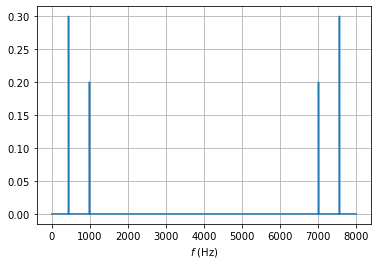

In [7]:
N = tom.size
f = arange(0,Fs,float(Fs)/N)    # abscissas: frequência (Hz)
plot(f,abs(fft.fft(tom))/N); xlabel('$f$ (Hz)'); grid('on')

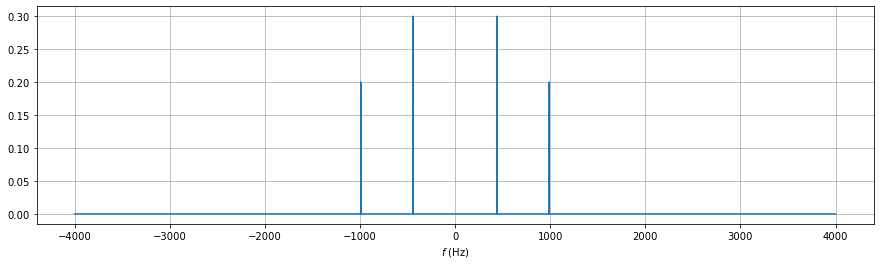

In [8]:
f = arange(-Fs/2,Fs/2,float(Fs)/N)    # abscissas: frequência (Hz)
figure(figsize=(15,4))
plot(f,abs(fft.fftshift(fft.fft(tom)))/N); 
xlabel('$f$ (Hz)'); grid('on')

## 4. Subamostragem<a name="subamostragem"></a>

O sinal pode ser subamostrado pegando uma amostra e desprezando a seguinte...

In [9]:
tom2 = tom[::2]               # y[n] = x[2n]
toca(tom2,Fs)                 # reproduz o sinal na freq. original

Para efeito de comparação toque esse sinal com a metade da frequência original:

In [10]:
toca(tom2,int(Fs/2))          # reproduz o sinal numa taxa reduzida

Como soa o sinal <span style="font-family:Courier New; font-size:1em;">tom2</span>? Como se compara a frequência deste sinal com a do primeiro sinal? O que se percebe ao ouvir ambos tons? Trace o espectro do sinal <span style="font-family:Courier New; font-size:1em;">tom2</span> nos moldes do que foi feito para o sinal <span style="font-family:Courier New; font-size:1em;">tom</span>. Explique as abscissas com picos.

## 5. Outras Decimações<a name="outras_decimacoes"></a>

Vamos experimentar outras decimações, ouvindo e plotando os espectros dos sinais decimandos. <p>Em particular, subamostre o sinal por 3,5,8,9,10,15. O que acontece na decimação a partir do fator 9? Por que?

Decimando por 3 ...
Pressione [Enter] p/ iniciar



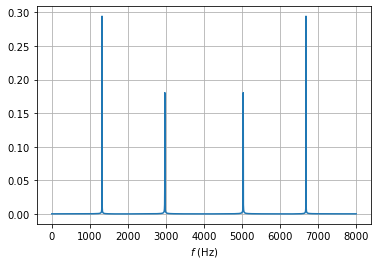

Decimando por 7 ...
Pressione [Enter] p/ iniciar



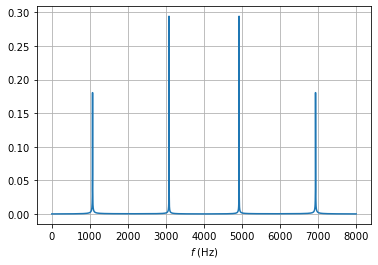

Decimando por 9 ...
Pressione [Enter] p/ iniciar



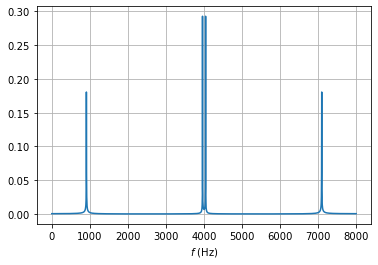

Decimando por 10 ...
Pressione [Enter] p/ iniciar



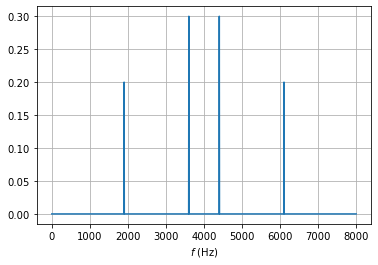

In [12]:
# gráficos serão incorporados ao notebook
fatores = [3,7,9,10]
for fator in fatores:
    print('Decimando por',fator,'...')
    input('Pressione [Enter] p/ iniciar\n')       # aguardando a tecla [Enter]
    tomdec = tom[::fator]                         # tom decimado
    N = len(tomdec)
    f = arange(0,Fs,float(Fs)/N)                  # abscissas: frequência (Hz)
    plot(f,abs(fft.fft(tomdec))/N); xlabel('$f$ (Hz)'); grid('on')
    show()                                        # magnitude do espectro do tom decimado
    toca(tomdec,Fs)                               # reproduz o tom decimado no alto-falante


### <font color="red">Exercício</font>
Descreva exatamente que frequência é produzida por cada um dos fatores de decimação. Descreva o que está acontecendo quando o sinal começa a diminuir em frequência. Qual o nome que se dá a esse fenômeno, considerando o comportamento espectral.  As raias de frequência mudam como esperado?

<font color="blue"><b>Solução</b></font> (clique duas vezes nessa célula para digitar a sua resposta):
  
  


### Mudança da taxa de reprodução

Agora vamos alterar a taxa (freq.) de reprodução.

In [13]:
toca(tom,int(Fs/1.9))

O comando anterior reproduz o sinal em 4000 amostras/seg (ao invés do padrão de 8000 amostras/seg). Com o que se parece o som reproduzido? Porque? <p>Experimente reproduzir o tom em taxas do tipo: Fs, 1.1\*Fs, 0.9\*Fs, 2\*Fs, Fs/2, Fs/3, Fs/4.
(escreva um pequeno *script* para facilitar a conclusão dessa tarefa.) <p>Descreva como o som produzido muda com estas taxas de amostragem, e porque? 

## 6. Sinal Gorjeio (<i>Chirp</i>) <a name="sinal_gorjeio"></a>

Agora vamos usar um sinal tipo gorjeio de pássaro, no qual a frequência instantânea muda com o tempo.  
Queremos um sinal que mude sua frequência no tempo, ou seja, no tempo inicial $t = 0$ a frequência deve ser de $f_1$ Hz e no tempo final $t = t_f$ a frequência deve ser de $f_2$ Hz, variando linearmente em função do tempo. Tal sinal é chamado de '*sinal chirp linear*'. <p>Para ajustar os parâmetros desse sinal, antes vamos dar uma olhada na relação entre frequência e fase de uma senoide. <p>Considere o sinal $s(t)$:

$$s(t)=cos(2\pi f_{0}t)$$

O argumento para a função cosseno é sempre a fase (sem dimensão). Neste caso, o argumento desse cosseno é $\theta(t)=2\pi f_0t$. Observe que a frequência do sinal pode ser calculada por:

$$\frac{1}{2\pi} \frac{d\theta(t)}{dt}=f_0$$

Nesse caso, a frequência é constante.  

Mais genericamente, podemos ter uma função de fase que não varia linearmente com o tempo, o que leva a uma frequência variante no tempo. Em geral, para uma função de fase $\theta(t)$ definimos como *frequência instantânea*:

$$f(t)=\frac{1}{2\pi} \frac{d\theta(t)}{dt}\tag 1$$

Agora vamos definir como queremos nossa frequência instantânea. Façamos $f(t)$ denotar a frequência como variável dependente do tempo. Queremos $f(0)=f_1$ e $f(t_f)=f_2$, variando linearmente entre esses extremos, $f(0)$ e $f(t_f)$. Então podemos  escrever:

$$f(t)=f_1+\frac{f_2-f_1}{t_f}t\;\;$$  ou   $$\;\;f(t)=f_1+m.t\;\;$$ onde $m$ é o fator angular da função linear $f(t)$: $$\;\;m=\frac{f_2-f_1}{t_f}t$$

Agora vamos usar isso no contexto da *frequência instantânea* definida na equação (1):

$$\frac{1}{2\pi} \frac{d\theta(t)}{dt}=f_1+m.t$$
$$\frac{d\theta(t)}{dt}-2\pi f_1 - 2\pi m.t=0$$

Integrando: $$\theta(t)=2\pi(f_1t+\frac{1}{2}m.t^2)\tag 2$$

 Portanto, a equação (2) é o argumento da função cosseno que gera o sinal tipo gorjeio (*chirp*). Ou seja:

$$s(t) = cos(\theta(t)) = cos\left[2\pi \left(f_1 + \frac{1}{2}m.t\right).t\right]$$

Observe que a quantidade que multiplica o tempo $t$ é $$f_1+\frac{m.t}{2}$$

No código abaixo, chamamos isso de frequência, embora não seja estritamente a frequência instantânea

In [14]:
Fs = 8000                    # frequência de amostragem
Ts = 1./Fs                   # período de amostragem

t0 = 0                       # tempo inicial
tf = 4                       # tempo final
t = arange(t0,tf,Ts)         # base temporal

f1 = 440                     # freq. inicial do gorjeio
f2 = 1000                    # freq. final do gorjeio
m = (f2-f1)/tfinal           # inclinação do gorjeio
fv = f1 + m*t/2              # frequência variante com o tempo (linear)

gorjeio = cos(2*pi*fv*t)     # sinal chirp

In [15]:
toca(gorjeio,Fs);

Explique o que está acontecendo e por que isso funciona. 
<p>Agora mude as frequências inicial e final para $f_1$ = 2000 Hz e $f_2$ = 8000 Hz. Gere um gráfico da frequência e toque o sinal como antes. Qual é a frequência final percebida? Por que a frequência aumenta e depois diminui?

In [16]:
# Seu código
f1 = 2000                    # freq. inicial do gorjeio
f2 = 8000                    # freq. final do gorjeio
m = (f2-f1)/tfinal           # inclinação do gorjeio
fv = f1 + m*t/2              # frequência variante com o tempo (linear)
gorjeio = cos(2*pi*fv*t)
toca(gorjeio,Fs);

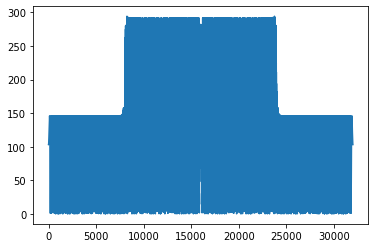

In [52]:
plot(abs(fft.fft(gorjeio))); show()

## 7. Aliasing na Música<a name="aliasing_na_musica"></a>

Agora vamos tentar o efeito aliasing numa música real. Existe um arquivo no sistema conhecido como handel, que tem um pedaço do Coro Aleluia. Você pode carregá-lo (na variável 'y') e reproduzi-lo

In [17]:
handel = loadmat("audio\handel.mat")
print( handel['y'])

[[ 0.        ]
 [-0.00615681]
 [-0.07503608]
 ...
 [ 0.22741703]
 [ 0.15045695]
 [ 0.        ]]


In [18]:
aleluia = handel['y']
Fs = 8192
toca(aleluia,Fs)

Para obter o efeito que o aliasing pode ter, experimente os seguintes comandos: 

In [19]:
toca(aleluia[::2], Fs) 

In [20]:
toca(aleluia[::2], int(Fs/2)); 

In [21]:
toca(aleluia[::3], int(Fs/3)); 

In [ ]:
toca(4*aleluia[::4], int(Fs/4)); 

In [22]:
toca(aleluia[::5], int(Fs/5));

### <font color="red">Exercício</font>
Descreva o efeito que esses comandos têm na reprodução da música e por que eles ocorrem. (Por exemplo, explique por que você obtém o coro de macacos no primeiro.) Por que tanto a decimação (como aleluia[::4]) e a alteração da taxa de amostragem (como Fs/4) são necessárias para manter as coisas corretamente.

<font color="blue"><b>Solução</b></font> (clique duas vezes nessa célula para digitar a sua resposta):
  
  


By **Prof. Cláudio A. Fleury**, Fev/19.